In [1]:
# pip install boto3
# pip install matplotlib

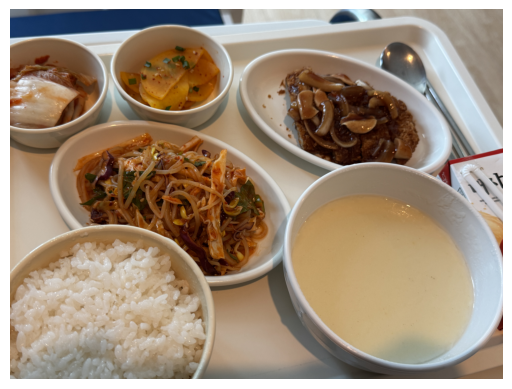

In [15]:
import matplotlib.pyplot as plt

img = plt.imread('./images/food1.jpg')

plt.axis('off')

plt.imshow(img)

In [12]:
import boto3
import base64

rekognition = boto3.client(
    'rekognition',
    aws_access_key_id='',
    aws_secret_access_key='',
    region_name='ap-northeast-2'
)

# with : 파일이 열고 닫히는 것을 자동으로 관리해주는 역할(파일 작업중에 예외가 발생해도 안전하게 닫아줌)
# rb : binary모드로 파일을 읽겠다는 의미
with open ('./images/food1.jpg', 'rb') as cf:
    # AWS Rekognition으로 전송을 하기위해 바이너리 데이터로 변환
    base64_image = base64.b64encode(cf.read())
    base64_binary = base64.decodebytes(base64_image)
    print('File Open!')
    
    
response = rekognition.detect_labels(Image={'Bytes':base64_binary})

response

File Open!


{'Labels': [{'Name': 'Food',
   'Confidence': 99.7139663696289,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Food and Beverage'}]},
  {'Name': 'Noodle',
   'Confidence': 99.7139663696289,
   'Instances': [],
   'Parents': [{'Name': 'Food'}],
   'Aliases': [],
   'Categories': [{'Name': 'Food and Beverage'}]},
  {'Name': 'Pasta',
   'Confidence': 97.39253234863281,
   'Instances': [],
   'Parents': [{'Name': 'Food'}],
   'Aliases': [],
   'Categories': [{'Name': 'Food and Beverage'}]},
  {'Name': 'Vermicelli',
   'Confidence': 97.39253234863281,
   'Instances': [],
   'Parents': [{'Name': 'Food'}, {'Name': 'Noodle'}, {'Name': 'Pasta'}],
   'Aliases': [],
   'Categories': [{'Name': 'Food and Beverage'}]},
  {'Name': 'Plate',
   'Confidence': 95.58940887451172,
   'Instances': [{'BoundingBox': {'Width': 0.43422186374664307,
      'Height': 0.34699392318725586,
      'Left': 0.4637431502342224,
      'Top': 0.10422138124704361},
     'Confidence': 95.